<a href="https://colab.research.google.com/github/ravitata/tensorflow2/blob/master/c2w1_Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [ ]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('/content/gdrive/My Drive/mydata/acute_inflammations/diagnosis.csv')
dataset = pd_dat.values

In [ ]:
print(pd_dat.head())
print('')
#list
print(dataset[:5,:])

      0  1  2  3  4  5  6  7
0  35.5  0  1  0  0  0  0  0
1  35.9  0  0  1  1  1  1  0
2  35.9  0  1  0  0  0  0  0
3  36.0  0  0  1  1  1  1  0
4  36.0  0  1  0  0  0  0  0

[[35.5  0.   1.   0.   0.   0.   0.   0. ]
 [35.9  0.   0.   1.   1.   1.   1.   0. ]
 [35.9  0.   1.   0.   0.   0.   0.   0. ]
 [36.   0.   0.   1.   1.   1.   1.   0. ]
 [36.   0.   1.   0.   0.   0.   0.   0. ]]


In [ ]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [ ]:
 x = np.arange(4).reshape((2,2))
 print(x)
 print('')
 print(np.transpose(x))
 c1, c2 = np.transpose(x)
 print('\n c1=', c1, '\nc2=', c2)

[[0 1]
 [2 3]]

[[0 2]
 [1 3]]

 c1= [0 2] 
c2= [1 3]


In [ ]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

In [ ]:
print('temp =', temp_train[:5])
print('\nnocc =', nocc_train[:5])
print(len(temp_train))

temp = [41.3 40.  36.6 40.7 41.5]

nocc = [1. 0. 0. 1. 0.]
80


#### Build the model

In [ ]:
# Build the input layers
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Model

shape_input = [1,]
temperature = Input(shape_input, name= 'temp')
nausea_occurence = Input(shape_input, name='nocc')
lumbar_pain = Input(shape_input, name='lumbp')
urine_pushing = Input(shape_input, name='up')
micturition_pains = Input(shape_input, name='mict')
bis= Input(shape_input, name='bis')


In [ ]:
temperature.shape

TensorShape([None, 1])

In [ ]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [ ]:
# Merge all input features into a single large vector

x = layers.concatenate(list_inputs)

In [ ]:
x.shape

TensorShape([None, 6])

In [ ]:
# Use a logistic regression classifier for disease prediction
inflammation_pred = layers.Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred = layers.Dense(1, activation='sigmoid', name='nephr')(x)

In [ ]:
inflammation_pred.shape

TensorShape([None, 1])

In [ ]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [ ]:
# Create the model object
model=tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

#### Plot the model

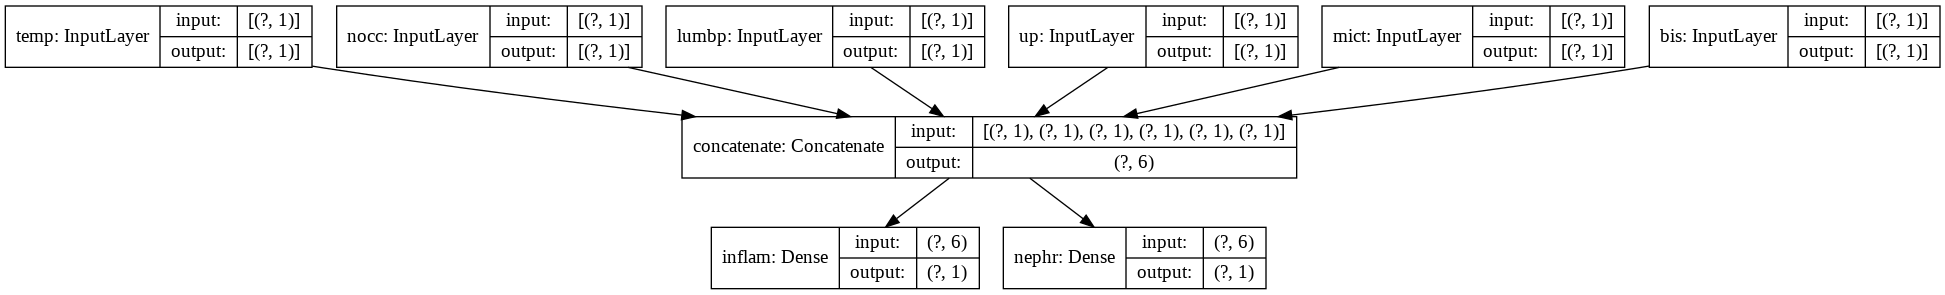

In [ ]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model,'multiple-input-output.png',show_shapes=True)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
temp (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
nocc (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
lumbp (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
up (InputLayer)                 [(None, 1)]          0                                            
_______________________________________________________________________________________

#### Compile the model

In [ ]:
# Compile the model
model.compile(optimizer='adam', 
              loss={'inflam':'binary_crossentropy',
                    'nephr': 'binary_crossentropy'},
              metrics='acc',
              loss_weights=[1, 0.2])


#### Fit the model 

In [ ]:
# Define training inputs and outputs

inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
                'up': up_train, 'mict': mict_train, 'bis': bis_train}

outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}

In [ ]:
# Train the model
history=model.fit(inputs_train, outputs_train, epochs=1000, verbose=False, batch_size=128)


#### Plot the learning curves

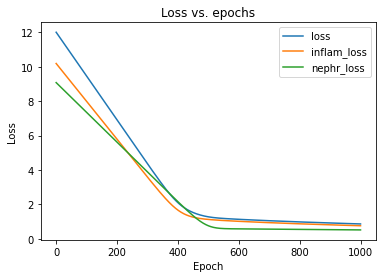

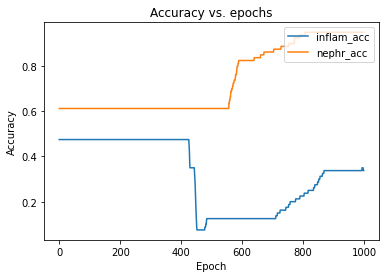

In [ ]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [ ]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test], [inflam_test, nephr_test])

2/2 [==============================] - 0s 3ms/step - loss: 0.8862 - inflam_loss: 0.7636 - nephr_loss: 0.6134 - inflam_acc: 0.3750 - nephr_acc: 0.8500


[0.8862388730049133,
 0.7635596394538879,
 0.6133958101272583,
 0.375,
 0.8500000238418579]

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, Flatten

inputs = Input(shape=(16, 16, 3))
h = Conv2D(32, 3)(inputs)
h = AveragePooling2D(3)(h)
outputs = Flatten()(h)
Model = Model(inputs=inputs, outputs=outputs)

In [ ]:
Model.output

<tf.Tensor 'flatten/Reshape:0' shape=(None, 512) dtype=float32>

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

In [ ]:
import numpy as np

#### Create Variable objects

In [ ]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [ ]:
ints

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [ ]:
# Initialise a Variable value

v=tf.constant(3.3, shape=(3,3))
v


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[3.3, 3.3, 3.3],
       [3.3, 3.3, 3.3],
       [3.3, 3.3, 3.3]], dtype=float32)>

#### Use and modify Variable values

In [ ]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.

print(type(w))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# Increment the value of a Variable
v.assign_add(1)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>

In [ ]:
# Decrement the value of a Variable
v.assign_add(-1)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [ ]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [ ]:
# Obtain the value as a numpy array
x.numpy()


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [ ]:
# Create a Tensor of type float32
tf.constant([[1,2,3],[2,3,4], [3,4,5]], dtype=tf.float32)


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.]], dtype=float32)>

In [ ]:
# Create coefficients

coeffs = np.arange(16)

In [ ]:
# Initialise shapes
shape1=[8,2]
shape2=[4,4]
shape3=[2,8]


In [ ]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]], shape=(2, 8), dtype=int64)


#### Useful Tensor operations

In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])

In [ ]:
# Get the rank of a Tensor
rank=tf.rank(t)


In [3]:
# Display the rank

print("rank: ", rank)

NameError: ignored

In [ ]:
# Reshape a Tensor
t2=tf.reshape(t, [8,10])


In [ ]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [ ]:
# Create ones, zeros, identity and constant Tensors
ones = tf.ones(3,3)
zeros=tf.zeros(2,2)
eye = tf.eye(3,3)
tensor7=tf.constant(7, shape=[2,2])


In [ ]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor([1 1 1], shape=(3,), dtype=int32)

 Zeros:
  tf.Tensor([0. 0.], shape=(2,), dtype=float64)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7 7]
 [7 7]], shape=(2, 2), dtype=int32)


In [ ]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))

In [ ]:
# Concatentate two Tensors
concat0=tf.concat([t1,t2], axis=0)
concat1=tf.concat([t1,t2], axis=1)

In [ ]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [ ]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [ ]:
# Expanding the rank of Tensors
t1 = tf.expand_dims(t, 0)
t2 = tf.expand_dims(t, 2)
t3 = tf.expand_dims(t, 3)


In [ ]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 2, 1, 4) 
 t3 shape:  (3, 2, 4, 1)


In [ ]:
# Squeezing redundant dimensions
t1 = tf.squeeze(t1,axis=0)
t2 = tf.squeeze(t2, 2)
t3 = tf.squeeze(t3, 3)


In [ ]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [ ]:
# Slicing a Tensor
t = tf.constant([1,2,3,4,5,6,7])
print(t[1:4])


tf.Tensor([2 3 4], shape=(3,), dtype=int32)


#### Doing maths with Tensors

In [ ]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])

In [ ]:
# Matrix multiplication
matmul_cd=tf.matmul(c,d)


In [ ]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [ ]:
# Elementwise operations
c_times_d = c*d
c_plus_d = c+d
c_minus_d  = c-d
c_div_c = c/c


In [ ]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])

In [ ]:
# Absolute value of a Tensor
absx = tf.abs(a)


In [ ]:
# Power of a Tensor
powab=tf.pow(a,b)


In [ ]:
# Display the results

print("\n ", absx)
print("\n ", powab)


  tf.Tensor(
[[2 3]
 [3 3]], shape=(2, 2), dtype=int32)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [ ]:
# Create a Tensor with samples from a Normal distribution

tn=tf.random.normal([2,2], mean=0, stddev=1.0, dtype=tf.float32)

In [ ]:
# Create a Tensor with samples from a Uniform distribution
tf.random.uniform([2,2],minval=0, maxval=10)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[9.200169, 8.48826 ],
       [9.326269, 6.912059]], dtype=float32)>

In [ ]:
# Create a Tensor with samples from a Poisson distribution
tf.random.poisson([2,2], 5)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[11.,  3.],
       [ 7.,  2.]], dtype=float32)>

In [ ]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [5]:
from tensorflow.keras.applications import VGG19
# Load the VGG19 model

vgg_model = VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [6]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

#### Build a model to access the layer outputs

In [7]:
from tensorflow.keras.models import Model

In [8]:
# Build a model that returns the layer outputs

#vgg_layers
layer_outputs = [layer.output for layer in vgg_layers]
print(layer_outputs[2])
#features = Model(inputs=vgg_input, outputs=layer_outputs[2])
features = Model(inputs=vgg_input, outputs=layer_outputs)
print('input_shape = ', features.layers[2].input_shape, ' output_shape = ', features.layers[2].output_shape)

Tensor("block1_conv2/Relu:0", shape=(None, 224, 224, 64), dtype=float32)
input_shape =  (None, 224, 224, 64)  output_shape =  (None, 224, 224, 64)


In [9]:
print(vgg_model.input)
print(vgg_model.output)
print(vgg_model.get_layer('input_1').input)
print(vgg_model.get_layer('predictions').output)

print(vgg_model.get_layer('predictions').input)


Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(None, 1000), dtype=float32)
Tensor("input_1:0", shape=(None, 224, 224, 3), dtype=float32)
Tensor("predictions/Softmax:0", shape=(None, 1000), dtype=float32)
Tensor("fc2/Relu:0", shape=(None, 4096), dtype=float32)


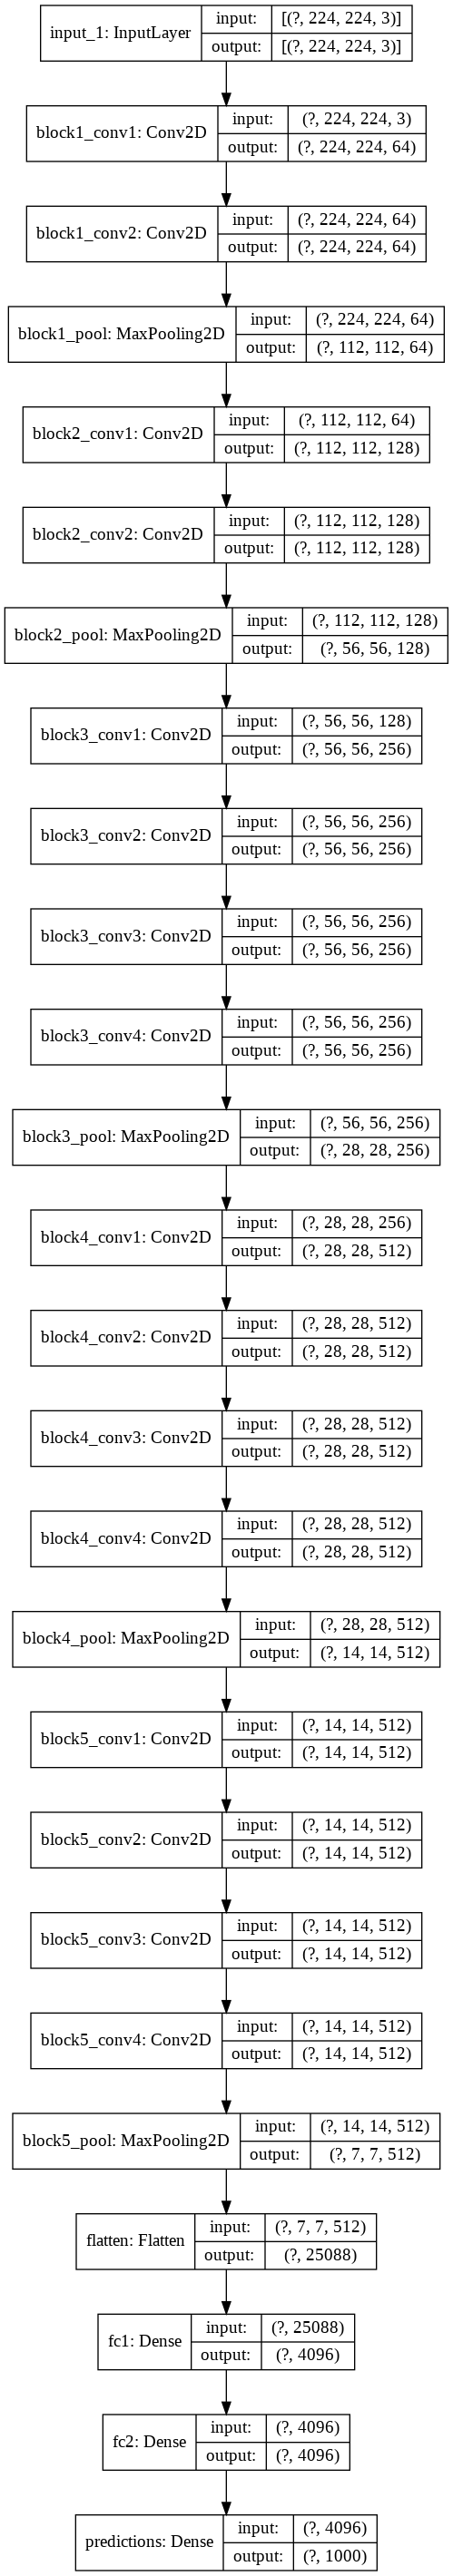

In [10]:
# Plot the model
tf.keras.utils.plot_model(features,'vgg19_layer.png',show_shapes=True)

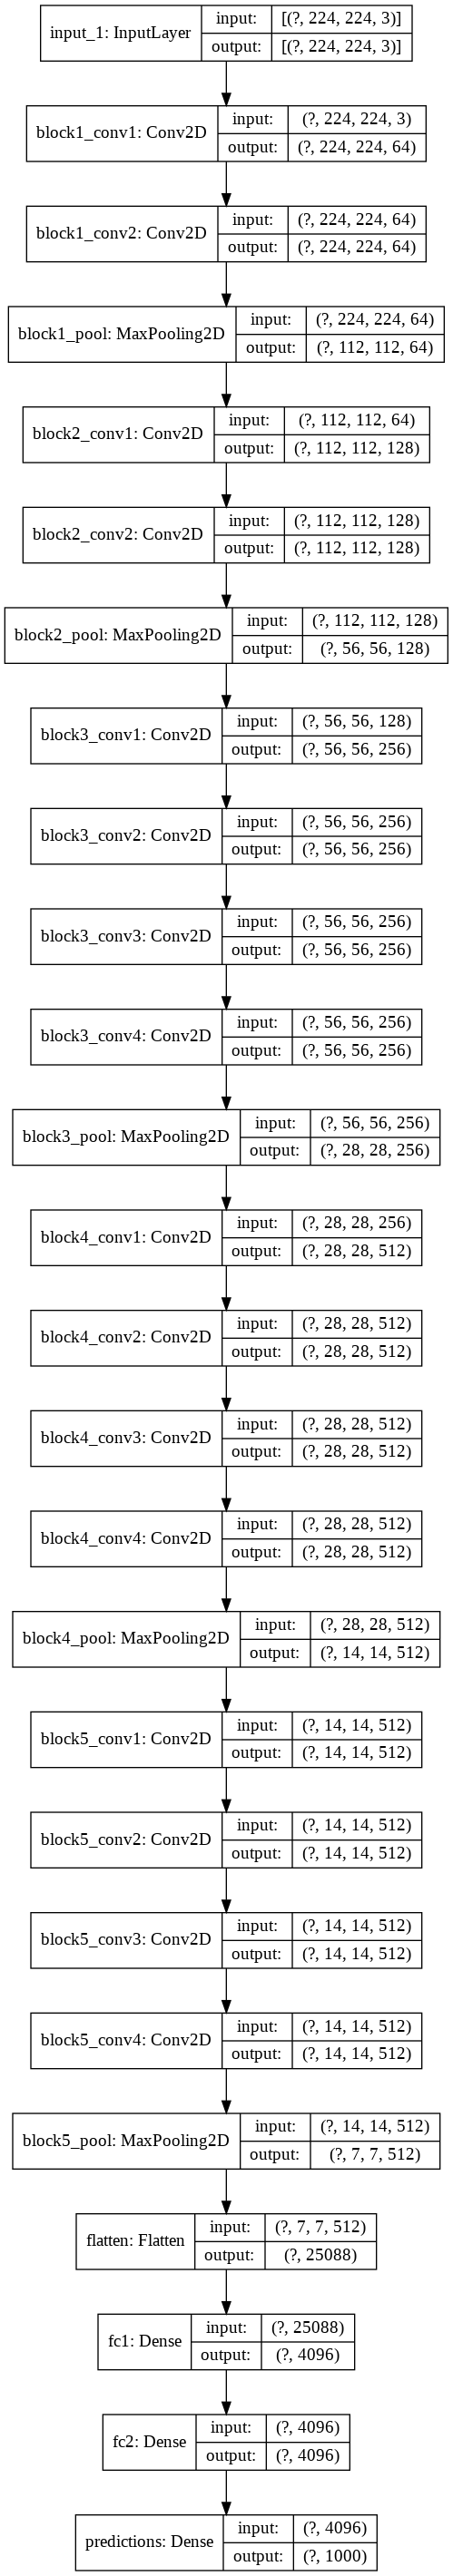

In [11]:
#This is same as above
tf.keras.utils.plot_model(vgg_model,'vgg19_layer.png',show_shapes=True)

In [12]:
# Test the model on a random input
img = np.random.random((1,224,224,3)).astype('float')
extracted_features = features.predict(img)


#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


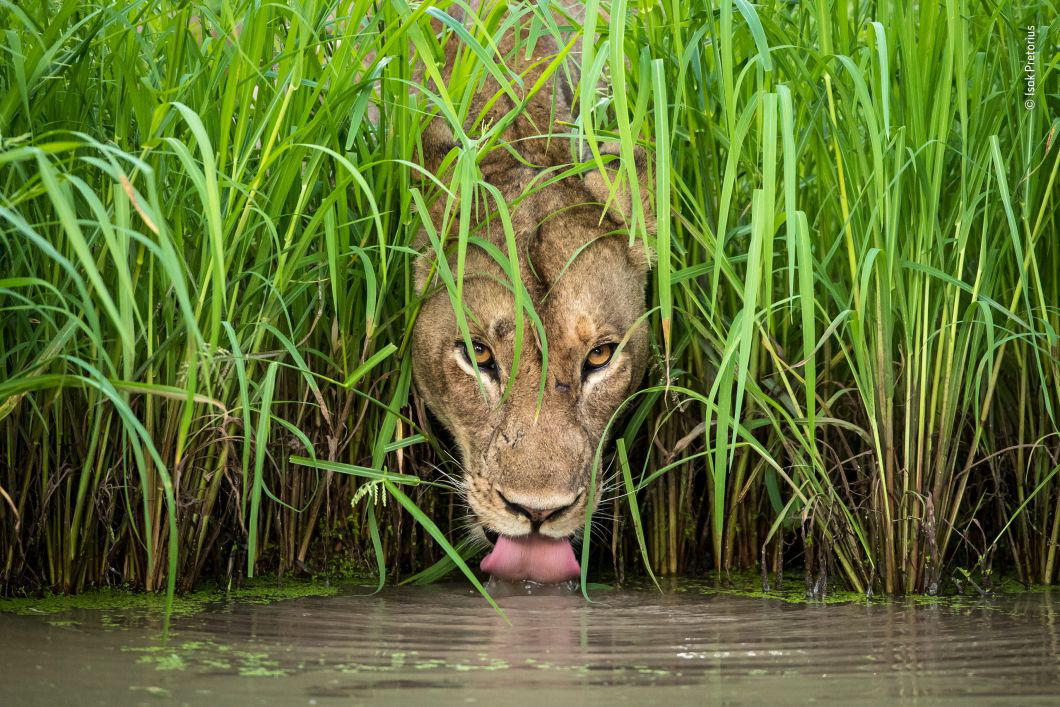

In [14]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('/content/drive/My Drive/mydata/cool_cat.jpg'))

#### Visualise network features from the input image

In [15]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/My Drive/mydata/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [16]:
# Extract the features

extracted_features = features.predict(x)


Shape =  (1, 224, 224, 3)
(224, 224, 3)


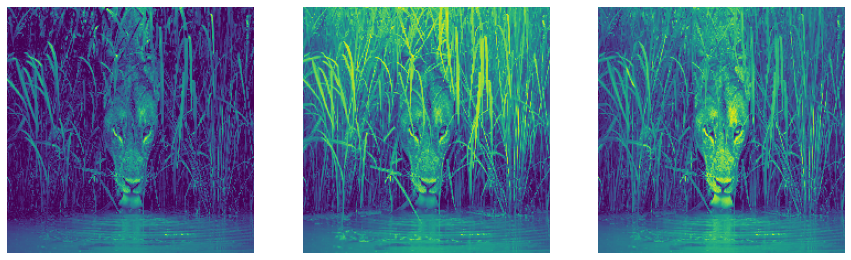

In [17]:
# Visualise the input channels
f1 = extracted_features[0]
print('Shape = ', f1.shape) 
imgs = f1[0, :, :, :]
print(imgs.shape)
plt.figure(figsize=[15,15])
for c in range(3):
  ax = plt.subplot(1,3,c+1)
  plt.imshow(imgs[:,:,c])
  plt.axis('off')
plt.show()

Shape =  (1, 224, 224, 64)
(224, 224, 64)


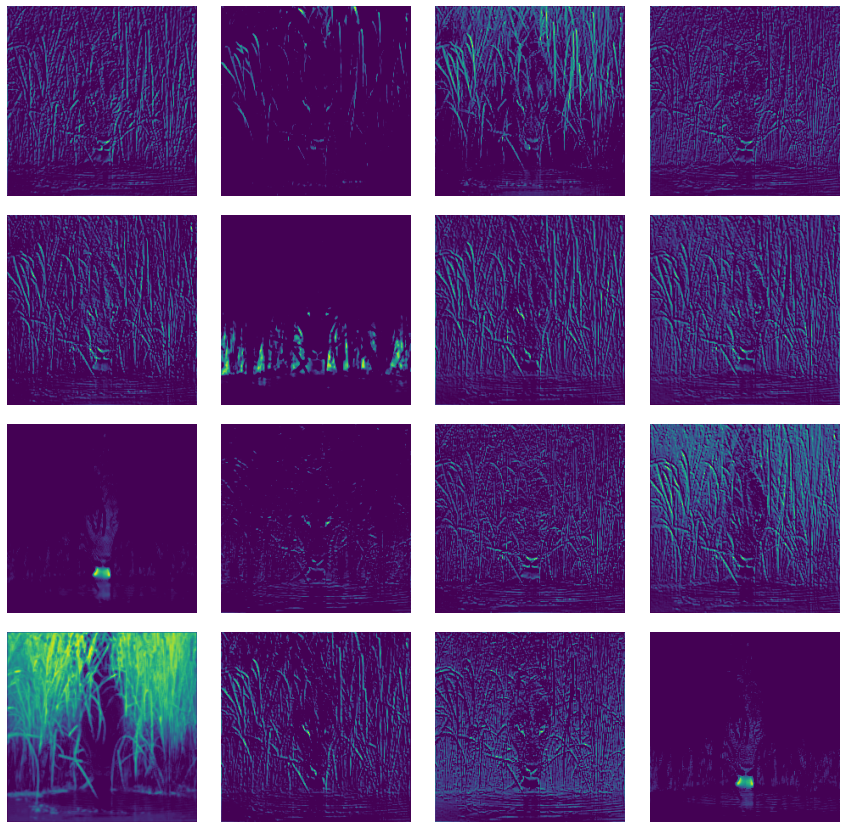

In [19]:
# Visualise some features in the first hidden layer

#The first hidden layer has 64 channels. Showing below only 16 channel features in a range
f1 = extracted_features[1]
print('Shape = ', f1.shape) 
imgs = f1[0, :, :, :]
print(imgs.shape)
plt.figure(figsize=[15,15])
start = 0
end = 16
for c in range(start, end):
  ax = plt.subplot(4,4,c-start+1)
  plt.imshow(imgs[:,:,c])
  plt.axis('off')
plt.subplots_adjust(hspace=0.1, wspace=.1)

Shape =  (1, 224, 224, 64)
(224, 224, 64)


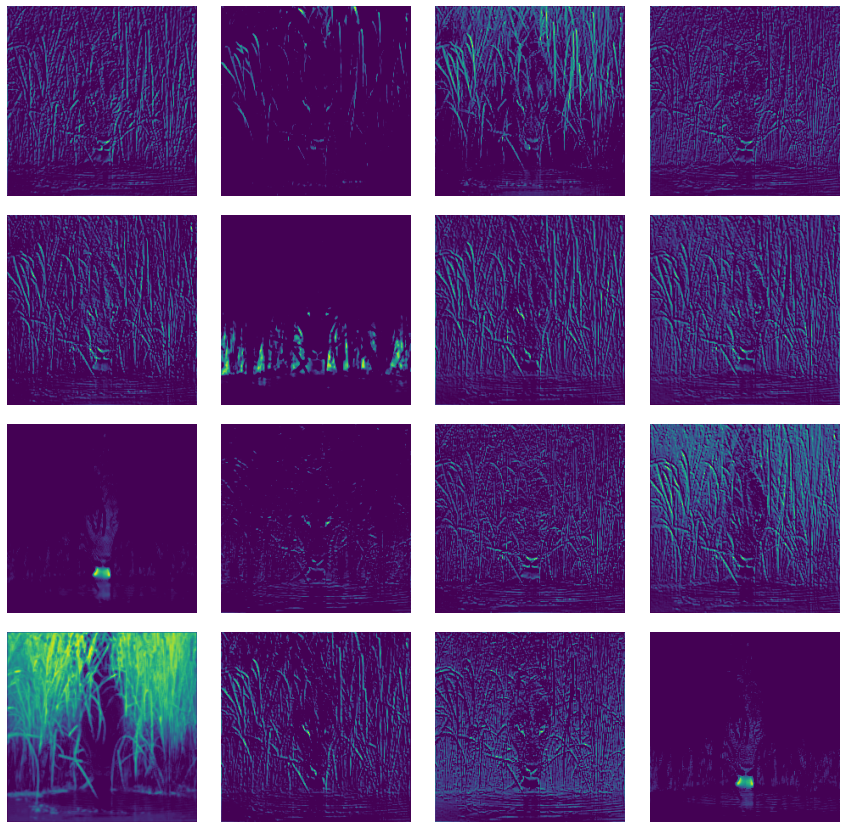

In [20]:
# Build a model to extract features by layer name

extracted_features_block1_conv1 =Model(inputs=features.input, outputs=features.get_layer('block1_conv1').output)
block1_conv1_features = extracted_features_block1_conv1.predict(x)

f1 = block1_conv1_features

print('Shape = ', f1.shape) 
imgs = f1[0, :, :, :]
print(imgs.shape)
plt.figure(figsize=[15,15])
start = 0
end = 16
for c in range(start, end):
  ax = plt.subplot(4,4,c-start+1)
  plt.imshow(imgs[:,:,c])
  plt.axis('off')
plt.subplots_adjust(hspace=0.1, wspace=.1)


In [ ]:
# Visualise some features from the extracted layer output



Shape =  (1, 14, 14, 512)
(14, 14, 512)


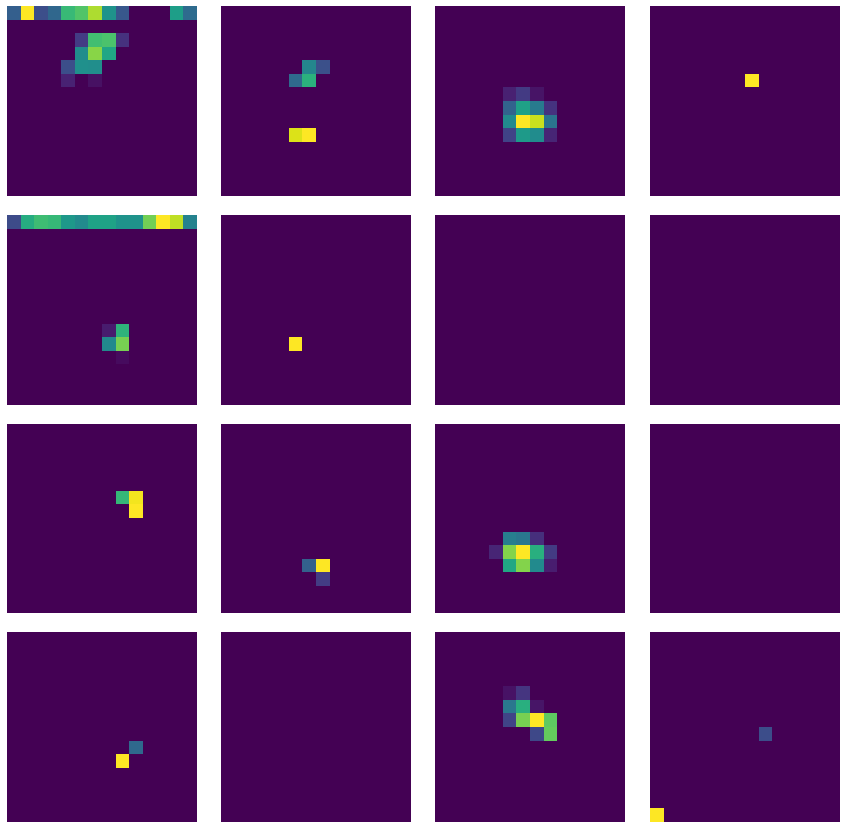

In [21]:
# Extract features from a layer deeper in the network

# Build a model to extract features by layer name

extracted_features_block1_conv1 =Model(inputs=features.input, outputs=features.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block1_conv1.predict(x)

f1 = block5_conv4_features

print('Shape = ', f1.shape) 
imgs = f1[0, :, :, :]
print(imgs.shape)
plt.figure(figsize=[15,15])
start = 0
end = 16
for c in range(start, end):
  ax = plt.subplot(4,4,c-start+1)
  plt.imshow(imgs[:,:,c])
  plt.axis('off')
plt.subplots_adjust(hspace=0.1, wspace=.1)


In [ ]:
# Visualise some features from the extracted layer output



***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [74]:
del model

In [75]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [76]:
# Display the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [77]:
# Retrieve the weights and biases
print('Weights in dense_1 layer')
print(model.get_layer(index=1).weights)
#print('\nWeights in dense_2 layer')
#print(model.layers[2].weights)


Weights in dense_1 layer
[<tf.Variable 'dense_7/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[ 0.15707989, -0.44607356],
       [-0.02875135, -0.17029016],
       [-0.7467769 , -0.04627471],
       [-0.10040042,  0.78265667]], dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>]


In [78]:
W0_layers = [l.weights[0] for l in model.layers]
b0_layers = [l.weights[1] for l in model.layers]

In [79]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [80]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [81]:
# Retrieve weights and biases
#print('Weights in dense_1 layer after training')
#print(model.get_layer(index=1).weights)
#print('\nWeights in dense_2 layer after training')
#print(model.layers[2].weights)

W1_layers = [l.weights[0] for l in model.layers]
b1_layers = [l.weights[1] for l in model.layers]


Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.0


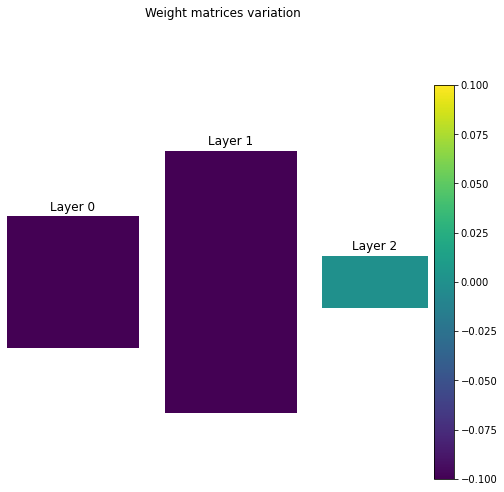

In [82]:
# Plot the variation

plt.figure(figsize=(8,8))
for n in range(3):
    delta_l = W1_layers[n] - W0_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - b0_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
plt.colorbar()
plt.suptitle('Weight matrices variation');

#### Freeze layers at build time

In [ ]:
# Count the trainable and non trainable variables before the freezing



In [ ]:
# Display the number of trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Build the model



In [ ]:
# Count the trainable and non trainable variables after the freezing



In [ ]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)

In [ ]:
# Retrieve weights and biases



In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation



#### Freeze layers of a pre-built model

In [ ]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Freeze the second layer



In [ ]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))

In [ ]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [ ]:
# Retrieve weights and biases



In [ ]:
# Plot the variation

